# Reducing Customer Complaints: Targeted Call Campaign Analysis 

## About the Challenge:

Customers of our store have been complaining regularly on social media posts, in an effort to reduce the number of complaints, we have decided to start a campaign to call our customers who are more likely to complain, in order to collect their opinions on how to serve them better. Using transaction history for the last 30 days, create a machine learning model using python to predict whether the customer will complain by the end of the month or not.

## Problem Statement:

The challenge is to effectively reduce the number of customer complaints for our store by implementing a targeted campaign to engage customers who are more likely to complain. By proactively reaching out to these customers and gathering their opinions, we aim to enhance our understanding of their concerns and preferences, leading to improved service and customer satisfaction.

Key Objectives:
- Identify customers who are more likely to complain based on relevant factors from transaction data for the last 30 days.
- Develop a machine learning model to predict customers complaint likelihood for the call campaign.
- Engage customers through personalized phone calls to collect their feedback, suggestions, and opinions on how to better serve them.
- Address customer concerns promptly and resolve any outstanding complaints raised during the calls.
- Analyze the feedback received and identify common themes, issues, and areas for improvement.
- Take necessary actions based on customer feedback to enhance our products, services, or processes.
- Monitor and track the impact of the call campaign by measuring the reduction in customer complaints and improvements in customer satisfaction ratings.
- Continuously iterate and refine the campaign strategy to optimize its effectiveness over time.

## Hypothesis:

We hypothesize that by leveraging transaction history data from the last 30 days and building a machine learning model in Python, it is possible to predict whether a customer will submit a complaint by the end of the month. We anticipate that certain patterns and characteristics within the transaction history can serve as indicators of a customer's likelihood to complain. By accurately identifying customers who are more likely to complain, we can proactively reach out to them through a targeted call campaign and gather their opinions to enhance our service and mitigate potential complaints.

## Importing Necessary Libraries

In [253]:
## Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc as sklearn_auc

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Set pandas to display numbers in full format
pd.set_option('display.float_format', '{:.2f}'.format)

# Filter out warnings
import warnings
warnings.filterwarnings("ignore")

## Loading and Preparing Data

In [254]:
# Setting the dataset location
DATASET_URL = "../data/store_complains_DS Interview Data Set.csv"

In [255]:
# Loading dataset
df = pd.read_csv(DATASET_URL)

In [256]:
# Get the dimensions of the dataset
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (31924, 22)


## Exploratory Data Analysis (EDA)

In [257]:
# View the first 5 rows of the dataset
df.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,Breakfast,0.00,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,YES,Other,1.00,1.00,Visa,No,no,49,Female
1,64257ffc9a53006421b72c40,Frozen,0.00,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,YES,Pickup,3000.00,1.00,Visa,No,no,82,Female
2,642580229a53006421b72c41,Alcohol,0.00,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,NO,Walk In,22000.00,1.00,Visa,No,no,35,Male
3,642580469a53006421b72c42,Baking,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.00,5.00,Mastercard,No,YEs,95,Female
4,642580469a53006421b72c42,Alcohol,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,NO,Walk In,1600000.00,5.00,Mastercard,No,YEs,95,Female


In [258]:
# Checking total number of customers
df.customer_registration_number.nunique()

23964

- The statistics indicate that there are a total of 31K transactions in the dataset. 
- These transactions involve interactions with 23K unique customers.
- Some customers may have made multiple transactions. This could be due to repeat purchases, multiple visits to the store, or other factors. 
- Analyzing the behavior of these customers and their transaction patterns can provide valuable insights into customer loyalty, engagement, and overall business performance.

In [259]:
# Calculate the average number of transactions per customer
total_transactions = len(df)

unique_customers = df['customer_registration_number'].nunique()

average_transactions_per_customer = total_transactions / unique_customers

print(f"Average transactions per customer: {np.round(average_transactions_per_customer,2)}")

Average transactions per customer: 1.33


In [260]:
# Check for duplicates in the entire dataset
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


- No duplicate records from trasaction historical data which is good sign that every record is unique.

In [261]:
# Get a concise summary of the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31924 entries, 0 to 31923
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_registration_number  31924 non-null  object 
 1   merchandize_category          26843 non-null  object 
 2   amount_deposited_via_counter  31924 non-null  float64
 3   amount_deposited_via_card     31924 non-null  float64
 4   balance_on_complaign_date     31924 non-null  float64
 5   transaction_date              31924 non-null  object 
 6   complaint_date                31924 non-null  object 
 7   restaurant_points             31924 non-null  int64  
 8   fuel_points                   31924 non-null  int64  
 9   groceries_points              31924 non-null  int64  
 10  toys_points                   31924 non-null  int64  
 11  cash_back_points              31924 non-null  int64  
 12  electronics                   31924 no

- The dataset contain 3 category of datatypes `Floats`, `Integer` and`Objects`.
- We can spot missing values from `merchandize_category`, `amount`, and `quantity`.
- We have `Datetime` features(transaction_date,complaint_date) which are objects, we have to convert into their original form to work with

In [262]:
# Statistical Summary of numerical features
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
amount_deposited_via_counter,31924.00,113725.18,4752873.47,-5900.00,0.00,0.00,0.00,700000000.00
amount_deposited_via_card,31924.00,674415.12,6580390.53,-199679.26,4100.00,4100.00,104100.00,700000000.00
balance_on_complaign_date,31924.00,680655.40,6771707.47,-11567.00,1140.00,4793.50,122153.75,700000000.00
restaurant_points,31924.00,0.24,1.02,0.00,0.00,0.00,0.00,59.00
fuel_points,31924.00,0.19,0.91,0.00,0.00,0.00,0.00,23.00
groceries_points,31924.00,0.37,1.35,0.00,0.00,0.00,0.00,27.00
toys_points,31924.00,0.00,0.14,0.00,0.00,0.00,0.00,22.00
cash_back_points,31924.00,0.33,1.33,0.00,0.00,0.00,0.00,26.00
electronics,31924.00,0.01,0.29,0.00,0.00,0.00,0.00,16.00
amount,31711.00,3136569.74,328769995.23,1.00,1.00,1.00,26000.00,50154406000.00


Here are the key points from the statistical summary:

1. Amount Deposited via Counter:
   - The mean amount deposited via counter is approximately 113,725.18.
   - The standard deviation is quite high, indicating a wide range of values.
   - The minimum and 25th percentile values are negative or zero, suggesting some customers might have withdrawn money instead of depositing.
   - The maximum amount deposited via counter is 700,000,000.00.

2. Amount Deposited via Card:
   - The mean amount deposited via card is approximately 674,415.12.
   - Similar to the amount deposited via counter, the standard deviation is high, indicating significant variation.
   - The minimum and 25th percentile values are negative or zero, indicating potential refunds or chargebacks.
   - The maximum amount deposited via card is 700,000,000.00.

3. Balance on Complaint Date:
   - The mean balance on the complaint date is approximately 680,655.40.
   - The standard deviation is again high, indicating substantial variation in account balances.
   - The minimum balance is negative, suggesting overdrafts or debt.
   - The maximum balance is 700,000,000.00.

4. Points Earned:
   - There are several categories of points earned, including restaurant, fuel, groceries, toys, and cash back.
   - The mean values for these categories are all relatively low, indicating that customers typically earn minimal points in these areas.
   - The maximum values for each category indicate the highest number of points earned in that category.

5. Electronics:
   - The mean value for electronics is very low, indicating that customers rarely earn points in this category.

6. Amount and Quantity:
   - The mean transaction amount is approximately 3,136,569.74.
   - The standard deviation is extremely high, indicating significant variation in transaction amounts.
   - The minimum and 25th percentile values are both 1, indicating that there are many low-value transactions.
   - The maximum transaction amount is a staggering 50,154,406,000.00.
   - The mean quantity of items purchased is approximately 3.14, with a wide range of values.

7. Customer Age:
   - The mean age of customers is approximately 49.37 (years/months/days?).
   - The standard deviation suggests a wide age range among customers.
   - The minimum age is 0, indicating the presence of customers who are potentially infants or newborns.
   - The maximum age is 99 (years/months/days?).

### EDA: Data Visualization

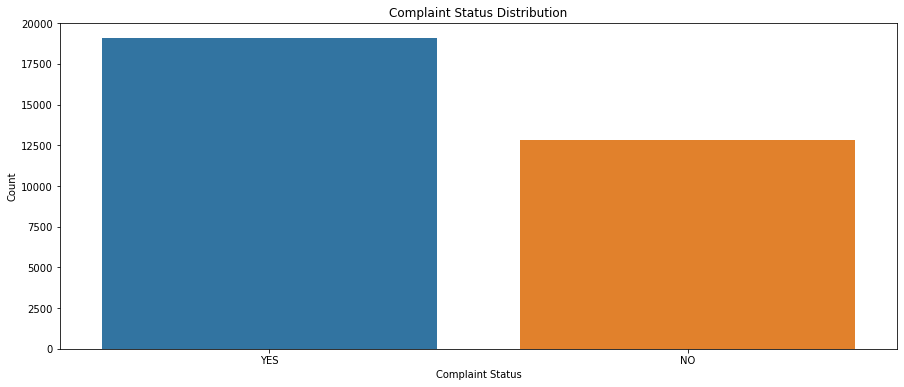

In [263]:
# Create the bar plot of the target variable
plt.figure(figsize=(15, 6))
sns.countplot(x='complained', data=df)
plt.xlabel('Complaint Status')
plt.ylabel('Count')
plt.title('Complaint Status Distribution')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/complaint_status.png')

plt.show()

- The distribution of the target variable reveals that the majority of customers have expressed their concerns by filing complaints (YES), while less than half of the customers have not registered any complaints (NO).

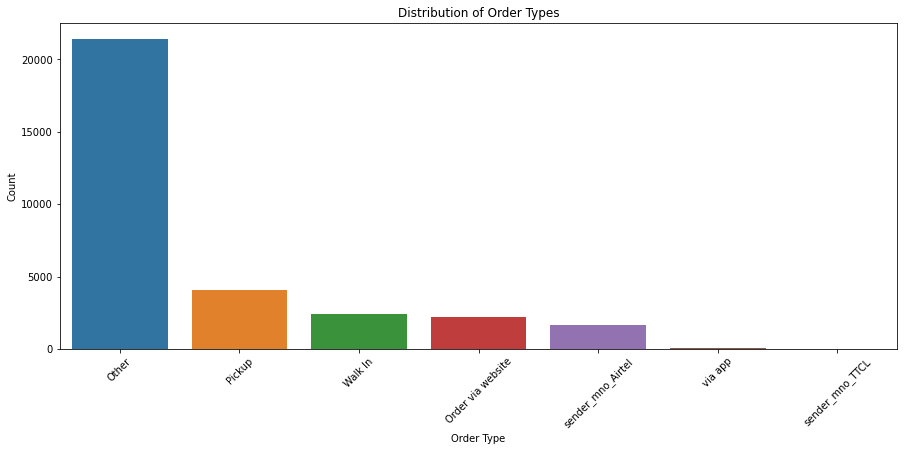

In [264]:
# Create the bar plot of the Order Type
plt.figure(figsize=(15, 6))
sns.countplot(x='Order_tyPe', data=df)
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Distribution of Order Types')
plt.xticks(rotation=45)

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/order_type.png')

plt.show()

- Most of type of orders are `Others` where `pickup`,`Walk In`, `Order via website` and `sender_mno_Airtel ` are comparable and least are `via app` and `sender_mno_TTCL`

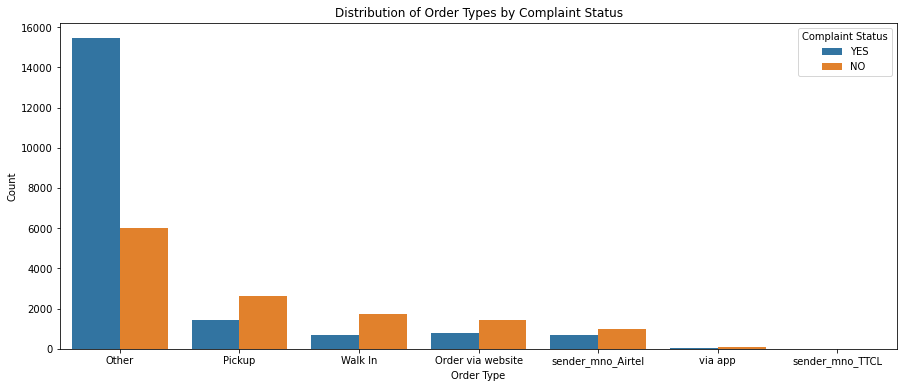

In [265]:
# Grouped bar plot of Order Types by Complaint Status
plt.figure(figsize=(15, 6))
sns.countplot(x='Order_tyPe', hue='complained', data=df)
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Distribution of Order Types by Complaint Status')
plt.legend(title='Complaint Status')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/order_type_complaint.png')

# Show the plot
plt.show()

- The ratio of customer complaints in `Others` is inversely and bigger compared to all other `Order_tyPe` where the majority of customers have filed complaints. The trend of the rest of Orders shows that majority of customers have not registered any complaints.
- Why Other? We can consider looking more of what are the specific orders from this category

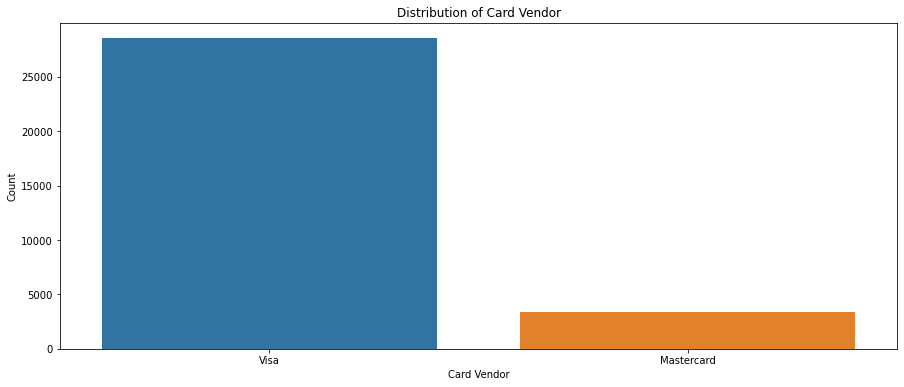

In [266]:
# Create the bar plot of the Type of Card Vendors
plt.figure(figsize=(15, 6))
sns.countplot(x='card_vendor', data=df)
plt.xlabel('Card Vendor')
plt.ylabel('Count')
plt.title('Distribution of Card Vendor')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/card_vendor.png')

plt.show()

- The distribution shows that majority of our customers are using `Visa` while minority are using `Mastercard` Cards.

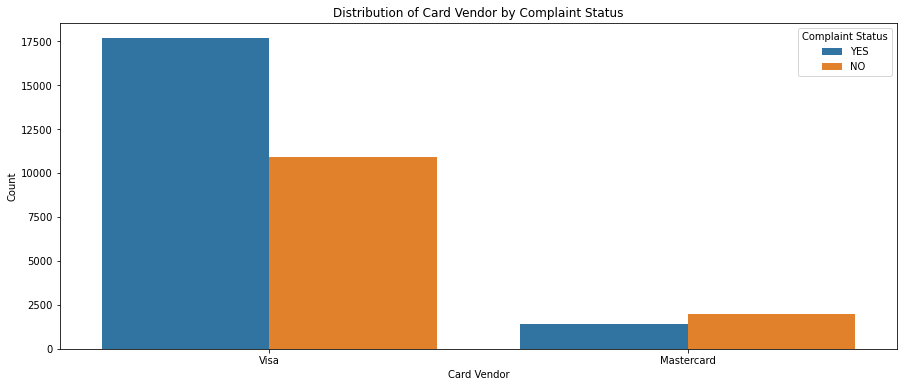

In [267]:
# Grouped bar plot of Card Vendor by Complaint Status
plt.figure(figsize=(15, 6))
sns.countplot(x='card_vendor', hue='complained', data=df)
plt.xlabel('Card Vendor')
plt.ylabel('Count')
plt.title('Distribution of Card Vendor by Complaint Status')
plt.legend(title='Complaint Status')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/card_vendor_complaint.png')

# Show the plot
plt.show()

- Majority of customers with visa cards have filed complaints while around 11k not.
- Mojority of customers with Mastercard have not regestered complaints while around 1500 have filed complaints
- This suggests that Card vendor could be a significant factor influencing customer complaints, and it should be taken into consideration when designing strategies to address customer concerns.

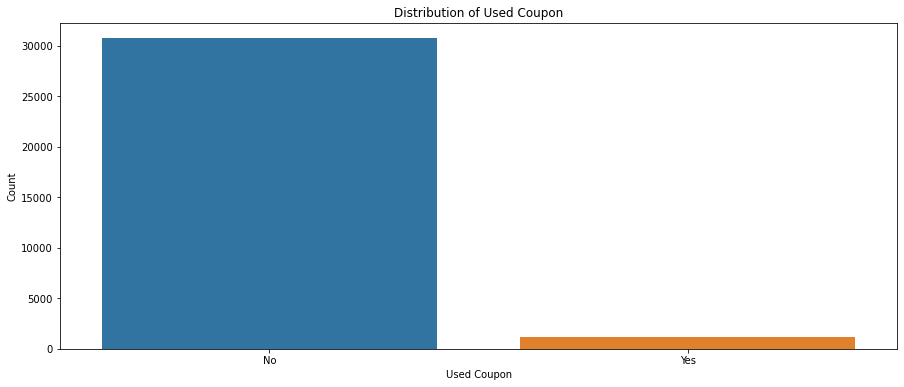

In [268]:
# Create the bar plot of the Used Coupon
plt.figure(figsize=(15, 6))
sns.countplot(x='used_coupon', data=df)
plt.xlabel('Used Coupon')
plt.ylabel('Count')
plt.title('Distribution of Used Coupon')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/used_coupon.png')

plt.show()

- The distribution show that only few of our customers used coupon

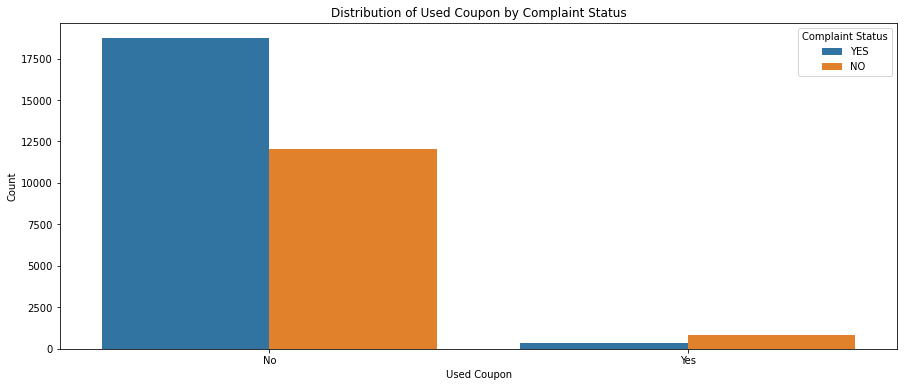

In [269]:
# Grouped bar plot of Used Coupon by Complaint Status
plt.figure(figsize=(15, 6))
sns.countplot(x='used_coupon', hue='complained', data=df)
plt.xlabel('Used Coupon')
plt.ylabel('Count')
plt.title('Distribution of Used Coupon by Complaint Status')
plt.legend(title='Complaint Status')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/used_coupon_complaint.png')

# Show the plot
plt.show()

- Majority of our customers used coupons have not registered complaints
- Majority of our customers which never used coupons have filed complaints

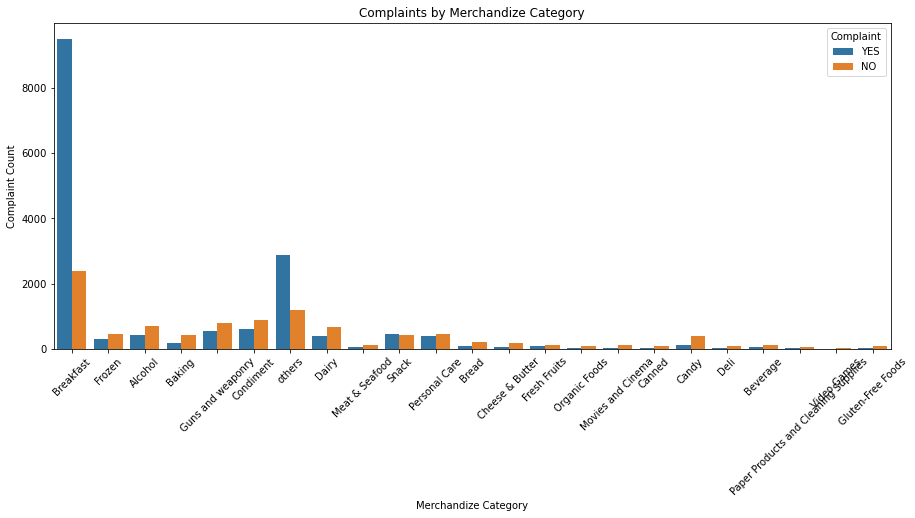

In [270]:
# Create a bar chart of complaint counts by merchandize category
plt.figure(figsize=(15, 6))
sns.countplot(x='merchandize_category', hue='complained', data=df)
plt.xlabel('Merchandize Category')
plt.ylabel('Complaint Count')
plt.title('Complaints by Merchandize Category')
plt.xticks(rotation=45)
plt.legend(title='Complaint')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/merchandize_category_complaint.png')

plt.show()

- We have 23 categories of Merchandize
- `Breakfast`, `Others` and `Meat & Seafood Snack` are the categories with highest number of customers with complaints compared to all other categories
- Suggests that Merchandize Category could be a significant factor influencing customer complaints, and it should be taken into consideration when designing strategies to address customer concerns.

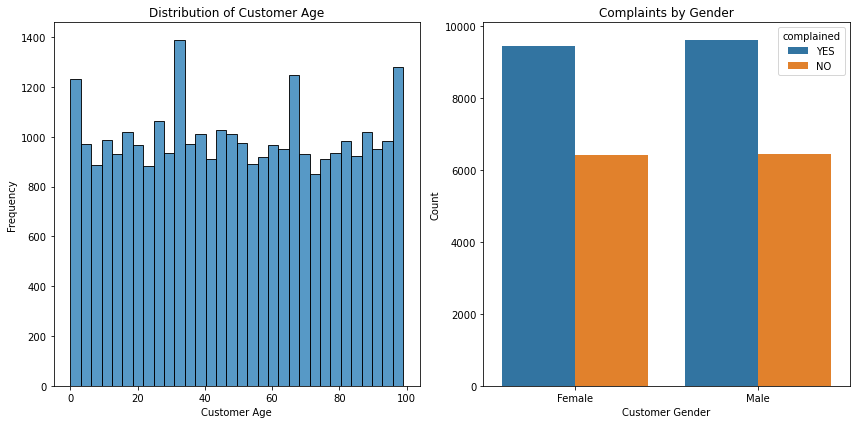

In [271]:
# Create subplots for age and gender visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the distribution of customer age
sns.histplot(data=df, x='cust_age', ax=axes[0])
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Customer Age')

# Plot the count of complaints by gender
sns.countplot(data=df, x='cust_gender', hue='complained', ax=axes[1])
axes[1].set_xlabel('Customer Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Complaints by Gender')

# Adjust the layout
plt.tight_layout()

plt.savefig('../EDA_Plots/customer_age_distribution_and_customer_gender_complaint.png')

# Show the plot
plt.show()

- The graph shows that the distribution of Male and Female customer weigh comparable which is good indication that no bias.
- Both Male and Female customers have high number of complaints, this suggests that gender may not be a significant factor influencing customer complaints.
- Distribution of customer age, the histogram of customer age distribution reveals interesting insights. The majority of customers fall below the age of 55, indicating a relatively younger customer base. Suggesting a higher concentration of younger customers. This information can be useful for targeting specific age segments in the call campaign, as different age groups may have different complaint patterns and preferences.

#### The Associations of Numeric Variables Using Correlation Analysis

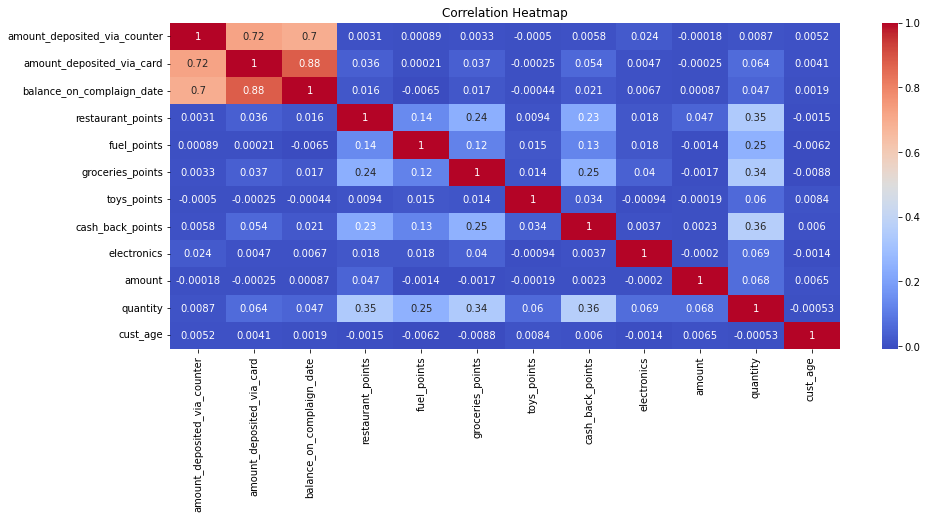

In [272]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Save the visualization to a specific directory
plt.savefig('../EDA_Plots/heatmap_vizualization.png')

plt.show()

- The `amount_deposited_via_card`, `balance_on_complain_date` and `amount_deposited_via_counter` are indicating the increase or decrease together which are highly positive correlated.
- Negative correlations are represented by cooler colors (blue), indicating that the variables have an inverse relationship.

## Data Preprocessing

### Data Preprocessing: Handeling Missing Values

In [273]:
# Counting missing values
df.isna().sum()

customer_registration_number       0
merchandize_category            5081
amount_deposited_via_counter       0
amount_deposited_via_card          0
balance_on_complaign_date          0
transaction_date                   0
complaint_date                     0
restaurant_points                  0
fuel_points                        0
groceries_points                   0
toys_points                        0
cash_back_points                   0
electronics                        0
complained                         0
Order_tyPe                         0
amount                           213
quantity                         249
card_vendor                        0
used_coupon                        0
product_discounted                 0
cust_age                           0
cust_gender                        0
dtype: int64

In [274]:
# Impute missing values
from sklearn.impute import SimpleImputer

# Creating instance by defining our strategy
imputer = SimpleImputer(strategy='most_frequent')

df_imputed = df.copy()

# Specify the columns to impute
columns_to_impute = ["merchandize_category", "amount", "quantity"]

# Applying instance to the dataset
df_imputed[columns_to_impute] = pd.DataFrame(imputer.fit_transform(df_imputed[columns_to_impute]))

#  Explicitly converting the imputed columns into original data types
df_imputed['amount'] = df_imputed['amount'].astype(float)
df_imputed['quantity'] = df_imputed['quantity'].astype(float)

- We choose to replace missing values with the most frequent value in the specific column.

In [275]:
# Comfirmation
df_imputed.isna().sum().any()

False

### Data Preprocessing: Encoding Categorical Variables

In [276]:
from sklearn.preprocessing import LabelEncoder

# Creating Label Encoder instance
encoder = LabelEncoder()

# Applying an instance to the specific columns
df_imputed['merchandize_category'] = encoder.fit_transform(df_imputed['merchandize_category'])
df_imputed['complained'] = encoder.fit_transform(df_imputed['complained'])
df_imputed['Order_tyPe'] = encoder.fit_transform(df_imputed['Order_tyPe'])
df_imputed['card_vendor'] = encoder.fit_transform(df_imputed['card_vendor'])
df_imputed['used_coupon'] = encoder.fit_transform(df_imputed['used_coupon'])
df_imputed['product_discounted'] = encoder.fit_transform(df_imputed['product_discounted'])
df_imputed['cust_gender'] = encoder.fit_transform(df_imputed['cust_gender'])

In [277]:
df_imputed.head()

,customer_registration_number,merchandize_category,amount_deposited_via_counter,amount_deposited_via_card,balance_on_complaign_date,transaction_date,complaint_date,restaurant_points,fuel_points,groceries_points,toys_points,cash_back_points,electronics,complained,Order_tyPe,amount,quantity,card_vendor,used_coupon,product_discounted,cust_age,cust_gender
0,64257fd79a53006421b72c3f,4,0.00,779.00,1272.00,2023-03-15,2023-03-29,0,0,0,0,0,0,1,1,1.00,1.00,1,0,1,49,0
1,64257ffc9a53006421b72c40,12,0.00,536.00,928.00,2023-03-15,2023-03-29,0,1,0,0,0,0,1,2,3000.00,1.00,1,0,1,82,0
2,642580229a53006421b72c41,0,0.00,330225.00,177850.00,2023-03-15,2023-03-29,0,0,0,0,1,0,0,3,22000.00,1.00,1,0,1,35,1
3,642580469a53006421b72c42,1,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,0,3,1600000.00,5.00,0,0,0,95,0
4,642580469a53006421b72c42,0,0.00,6215561.04,301542.04,2023-03-15,2023-03-29,3,0,1,0,1,0,0,3,1600000.00,5.00,0,0,0,95,0


### Data Preprocessing: Datetime

In [279]:
# Convert object to datetime using pandas
df_imputed["transaction_date"] = pd.to_datetime(df_imputed["transaction_date"])
df_imputed["complaint_date"] = pd.to_datetime(df_imputed["complaint_date"])

## Feature Engineering

In [280]:
# Calculate total amount deposited by each customer
df_imputed['total_deposited_amount'] = df_imputed['amount_deposited_via_counter'] + df_imputed['amount_deposited_via_card']

# Calculate average transaction amount per customer
df_imputed['avg_transaction_amount'] = df_imputed['amount'] / df_imputed['quantity']

# Calculate balance change from balance_on_complaign_date and total deposited amount
df_imputed['balance_change'] = df_imputed['balance_on_complaign_date'] - (df_imputed['amount_deposited_via_counter'] + df_imputed['amount_deposited_via_card'])

# Calculate total number of transactions per customer
df_imputed['total_transactions'] = df_imputed.groupby('customer_registration_number')['transaction_date'].transform('count')

# Extract features from transaction_date and complaint_date
df_imputed['transaction_month'] = df_imputed['transaction_date'].dt.month
df_imputed['complaint_month'] = df_imputed['complaint_date'].dt.month

# Calculate time duration between transaction date and complaint date
df_imputed['time_duration'] = (pd.to_datetime(df_imputed['complaint_date']) - pd.to_datetime(df_imputed['transaction_date'])).dt.days

# Calculate total points earned in each category per customer
category_columns = ['restaurant_points', 'fuel_points', 'groceries_points', 'toys_points', 'cash_back_points', 'electronics']
df_imputed['total_points'] = df_imputed[category_columns].sum(axis=1)

# Group customers and calculate aggregate statistics
grouped = df_imputed.groupby('customer_registration_number')
df_imputed['mean_amount'] = grouped['amount'].transform('mean')
df_imputed['sum_quantity'] = grouped['quantity'].transform('sum')
df_imputed['unique_categories'] = grouped['merchandize_category'].transform('nunique')

# Drop original columns that have been transformed
df_imputed.drop(['customer_registration_number','amount_deposited_via_counter', 'amount_deposited_via_card', 'balance_on_complaign_date',
                 'transaction_date', 'complaint_date', 'restaurant_points', 'fuel_points', 'groceries_points',
                 'toys_points', 'cash_back_points', 'electronics', 'amount', 'quantity'], axis=1, inplace=True)

In [281]:
df_imputed.head()

,merchandize_category,complained,Order_tyPe,card_vendor,used_coupon,product_discounted,cust_age,cust_gender,total_deposited_amount,avg_transaction_amount,balance_change,total_transactions,transaction_month,complaint_month,time_duration,total_points,mean_amount,sum_quantity,unique_categories
0,4,1,1,1,0,1,49,0,779.00,1.00,493.00,1,3,3,14,0,1.00,1.00,1
1,12,1,2,1,0,1,82,0,536.00,3000.00,392.00,1,3,3,14,1,3000.00,1.00,1
2,0,0,3,1,0,1,35,1,330225.00,22000.00,-152375.00,1,3,3,14,1,22000.00,1.00,1
3,1,0,3,0,0,0,95,0,6215561.04,320000.00,-5914019.00,3,3,3,14,5,1600000.00,15.00,3
4,0,0,3,0,0,0,95,0,6215561.04,320000.00,-5914019.00,3,3,3,14,5,1600000.00,15.00,3


## Machine Learning: Design and Implementation of the Call Campaign

### Feature selection

In [282]:
# Select the relevant columns for feature selection
selected_columns = ['merchandize_category', 'Order_tyPe', 'card_vendor','used_coupon', 'product_discounted',
                    'cust_age','total_deposited_amount', 'avg_transaction_amount', 
                    'balance_change','total_transactions', 'transaction_month', 'complaint_month',
                    'time_duration', 'total_points', 'mean_amount', 'sum_quantity','unique_categories']

# Create a new DataFrame with only the selected columns
df_selected = df_imputed[selected_columns]

# Split the data into features (X) and target variable (y)
X = df_selected
y = df_imputed['complained']

In [283]:
X.shape, y.shape

((31924, 17), (31924,))

### Model Training

In [284]:
# seeting seed for result eproducibility
SEED = 2020

In [285]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=SEED)

In [286]:
# Structure of each subset
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25539, 17), (25539,), (6385, 17), (6385,))

#### Baseline Models

In [231]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates machine learning models to predict the likelihood of customer complaints.
    
    Parameters:
        X_train (array-like): Training feature matrix of shape (n_samples_train, n_features) containing the input features.
        X_test (array-like): Testing feature matrix of shape (n_samples_test, n_features) containing the input features.
        y_train (array-like): Training target variable of shape (n_samples_train,) containing the labels.
        y_test (array-like): Testing target variable of shape (n_samples_test,) containing the labels.
        
    Returns:
        None
    """
    
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'LightGBM': lgb.LGBMClassifier(),
        'CatBoost': cb.CatBoostClassifier()
    }

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Print the results
        print(f"Model: {model_name}")
        print("Accuracy:", accuracy)
        print("F1-score:", f1)
        print("AUC:", auc)
        print("Confusion Matrix:\n", cm)
        print("-----------------------------------")

In [232]:
# Applying our function
train_and_evaluate_models(X_train, X_test, y_train, y_test)

Model: Logistic Regression
Accuracy: 0.41848081440877055
F1-score: 0.11826169555924958
AUC: 0.504210060200112
Confusion Matrix:
 [[2423  146]
 [3567  249]]
-----------------------------------
Model: Random Forest
Accuracy: 0.8258418167580266
F1-score: 0.8584881649274625
AUC: 0.8117486206691132
Confusion Matrix:
 [[1900  669]
 [ 443 3373]]
-----------------------------------
Model: LightGBM
Accuracy: 0.7957713390759593
F1-score: 0.838693715982187
AUC: 0.7732987776366009
Confusion Matrix:
 [[1691  878]
 [ 426 3390]]
-----------------------------------
Learning rate set to 0.041097
0:	learn: 0.6751773	total: 17.7ms	remaining: 17.7s
1:	learn: 0.6581750	total: 37.6ms	remaining: 18.8s
2:	learn: 0.6447627	total: 52.6ms	remaining: 17.5s
3:	learn: 0.6312654	total: 63.5ms	remaining: 15.8s
4:	learn: 0.6188424	total: 74.8ms	remaining: 14.9s
5:	learn: 0.6085097	total: 85.2ms	remaining: 14.1s
6:	learn: 0.5978451	total: 93.6ms	remaining: 13.3s
7:	learn: 0.5896458	total: 100ms	remaining: 12.4s
8:	lear

149:	learn: 0.4611661	total: 924ms	remaining: 5.23s
150:	learn: 0.4610473	total: 930ms	remaining: 5.23s
151:	learn: 0.4608792	total: 936ms	remaining: 5.22s
152:	learn: 0.4607570	total: 943ms	remaining: 5.22s
153:	learn: 0.4606342	total: 950ms	remaining: 5.22s
154:	learn: 0.4605157	total: 957ms	remaining: 5.22s
155:	learn: 0.4604434	total: 963ms	remaining: 5.21s
156:	learn: 0.4603417	total: 968ms	remaining: 5.2s
157:	learn: 0.4602391	total: 974ms	remaining: 5.19s
158:	learn: 0.4600394	total: 979ms	remaining: 5.18s
159:	learn: 0.4598295	total: 984ms	remaining: 5.17s
160:	learn: 0.4596841	total: 989ms	remaining: 5.15s
161:	learn: 0.4595014	total: 995ms	remaining: 5.15s
162:	learn: 0.4593033	total: 1s	remaining: 5.14s
163:	learn: 0.4591805	total: 1s	remaining: 5.13s
164:	learn: 0.4590702	total: 1.01s	remaining: 5.12s
165:	learn: 0.4589738	total: 1.01s	remaining: 5.1s
166:	learn: 0.4588728	total: 1.02s	remaining: 5.09s
167:	learn: 0.4586217	total: 1.02s	remaining: 5.08s
168:	learn: 0.458500

324:	learn: 0.4391266	total: 1.91s	remaining: 3.96s
325:	learn: 0.4389980	total: 1.92s	remaining: 3.96s
326:	learn: 0.4388869	total: 1.92s	remaining: 3.96s
327:	learn: 0.4387044	total: 1.93s	remaining: 3.96s
328:	learn: 0.4386056	total: 1.94s	remaining: 3.96s
329:	learn: 0.4384458	total: 1.95s	remaining: 3.95s
330:	learn: 0.4383005	total: 1.95s	remaining: 3.95s
331:	learn: 0.4381269	total: 1.96s	remaining: 3.94s
332:	learn: 0.4379650	total: 1.96s	remaining: 3.93s
333:	learn: 0.4378676	total: 1.97s	remaining: 3.92s
334:	learn: 0.4376549	total: 1.97s	remaining: 3.92s
335:	learn: 0.4375717	total: 1.98s	remaining: 3.91s
336:	learn: 0.4374758	total: 1.98s	remaining: 3.9s
337:	learn: 0.4374044	total: 1.99s	remaining: 3.9s
338:	learn: 0.4373136	total: 1.99s	remaining: 3.89s
339:	learn: 0.4372067	total: 2s	remaining: 3.88s
340:	learn: 0.4371080	total: 2s	remaining: 3.88s
341:	learn: 0.4369966	total: 2.01s	remaining: 3.87s
342:	learn: 0.4369197	total: 2.02s	remaining: 3.86s
343:	learn: 0.436804

494:	learn: 0.4215400	total: 2.89s	remaining: 2.94s
495:	learn: 0.4214903	total: 2.89s	remaining: 2.94s
496:	learn: 0.4214242	total: 2.9s	remaining: 2.94s
497:	learn: 0.4212889	total: 2.91s	remaining: 2.93s
498:	learn: 0.4211637	total: 2.92s	remaining: 2.93s
499:	learn: 0.4210641	total: 2.92s	remaining: 2.92s
500:	learn: 0.4209590	total: 2.93s	remaining: 2.92s
501:	learn: 0.4208931	total: 2.94s	remaining: 2.91s
502:	learn: 0.4208320	total: 2.94s	remaining: 2.9s
503:	learn: 0.4207573	total: 2.94s	remaining: 2.9s
504:	learn: 0.4206909	total: 2.95s	remaining: 2.89s
505:	learn: 0.4206441	total: 2.96s	remaining: 2.89s
506:	learn: 0.4205434	total: 2.96s	remaining: 2.88s
507:	learn: 0.4204372	total: 2.97s	remaining: 2.87s
508:	learn: 0.4203543	total: 2.97s	remaining: 2.87s
509:	learn: 0.4202853	total: 2.98s	remaining: 2.86s
510:	learn: 0.4201633	total: 2.98s	remaining: 2.85s
511:	learn: 0.4200903	total: 2.99s	remaining: 2.85s
512:	learn: 0.4199612	total: 3s	remaining: 2.84s
513:	learn: 0.4197

660:	learn: 0.4067732	total: 3.87s	remaining: 1.98s
661:	learn: 0.4067052	total: 3.87s	remaining: 1.98s
662:	learn: 0.4066196	total: 3.88s	remaining: 1.97s
663:	learn: 0.4065694	total: 3.88s	remaining: 1.97s
664:	learn: 0.4064783	total: 3.89s	remaining: 1.96s
665:	learn: 0.4063498	total: 3.9s	remaining: 1.96s
666:	learn: 0.4062646	total: 3.91s	remaining: 1.95s
667:	learn: 0.4061990	total: 3.91s	remaining: 1.94s
668:	learn: 0.4060810	total: 3.92s	remaining: 1.94s
669:	learn: 0.4059834	total: 3.92s	remaining: 1.93s
670:	learn: 0.4058753	total: 3.93s	remaining: 1.93s
671:	learn: 0.4057969	total: 3.94s	remaining: 1.92s
672:	learn: 0.4057574	total: 3.94s	remaining: 1.92s
673:	learn: 0.4056911	total: 3.95s	remaining: 1.91s
674:	learn: 0.4055840	total: 3.95s	remaining: 1.9s
675:	learn: 0.4055206	total: 3.96s	remaining: 1.9s
676:	learn: 0.4054052	total: 3.97s	remaining: 1.89s
677:	learn: 0.4053444	total: 3.97s	remaining: 1.89s
678:	learn: 0.4052470	total: 3.98s	remaining: 1.88s
679:	learn: 0.4

831:	learn: 0.3936633	total: 5.26s	remaining: 1.06s
832:	learn: 0.3936067	total: 5.26s	remaining: 1.05s
833:	learn: 0.3935370	total: 5.27s	remaining: 1.05s
834:	learn: 0.3934648	total: 5.28s	remaining: 1.04s
835:	learn: 0.3934092	total: 5.28s	remaining: 1.04s
836:	learn: 0.3933324	total: 5.29s	remaining: 1.03s
837:	learn: 0.3932644	total: 5.3s	remaining: 1.02s
838:	learn: 0.3931480	total: 5.3s	remaining: 1.02s
839:	learn: 0.3930710	total: 5.31s	remaining: 1.01s
840:	learn: 0.3930166	total: 5.31s	remaining: 1s
841:	learn: 0.3929498	total: 5.32s	remaining: 998ms
842:	learn: 0.3928740	total: 5.33s	remaining: 992ms
843:	learn: 0.3928124	total: 5.33s	remaining: 986ms
844:	learn: 0.3927808	total: 5.34s	remaining: 980ms
845:	learn: 0.3926915	total: 5.34s	remaining: 973ms
846:	learn: 0.3926522	total: 5.35s	remaining: 967ms
847:	learn: 0.3925597	total: 5.36s	remaining: 961ms
848:	learn: 0.3925312	total: 5.37s	remaining: 955ms
849:	learn: 0.3924773	total: 5.38s	remaining: 949ms
850:	learn: 0.392

999:	learn: 0.3828847	total: 6.67s	remaining: 0us
Model: CatBoost
Accuracy: 0.8062646828504307
F1-score: 0.8465831576336351
AUC: 0.78487604791201
Confusion Matrix:
 [[1735  834]
 [ 403 3413]]
-----------------------------------


- With default parameters `Random Forest Classifer` and `CatBoost Classifier` are predicting well the number of customers have complaints about 3371 and 3413 respectively and Minimal risk of predicting customer with no complaints as complained of about 669 and 834 respectively.
- For this case playing with either `Random Forest Classifer` or `CatBoost Classifier` by optimizing its performances is can both provide effective solution.
- Taking into account that `CatBoost` is capturing well the customer with complaints but Let's move forward with `Random Forest Classifier` because show to balance the risk and accurate capturing the problem we are solving.

#### Hyperameter Tuning

**You can skip execting the cell below, because it may take time to produce results**

In [233]:
def train_and_evaluate_rf(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates the Random Forest classifier to predict the likelihood of customer complaints.
    Performs hyperparameter tuning using grid search.
    
    Parameters:
        X_train (array-like): Training feature matrix of shape (n_samples_train, n_features) containing the input features.
        X_test (array-like): Testing feature matrix of shape (n_samples_test, n_features) containing the input features.
        y_train (array-like): Training target variable of shape (n_samples_train,) containing the labels.
        y_test (array-like): Testing target variable of shape (n_samples_test,) containing the labels.
        
    Returns:
        None
    """
    
    # Define the parameter grid for grid search
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 4,5,8,10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'random_state': [42,2020]
    }
    
    # Initialize the Random Forest classifier
    model = RandomForestClassifier()

    # Perform grid search using cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score from grid search
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Train the Random Forest model with the best parameters
    model = RandomForestClassifier(**best_params)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Print the results
    print("Random Forest Model")
    print("Best Parameters:", best_params)
    print("Best Score:", best_score)
    print("Accuracy:", accuracy)
    print("F1-score:", f1)
    print("AUC:", auc)
    print("Confusion Matrix:\n", cm)

# Apply the function
train_and_evaluate_rf(X_train, X_test, y_train, y_test)

Random Forest Model
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
Best Score: 0.8149107609298827
Accuracy: 0.8294440093970242
F1-score: 0.8638239339752407
AUC: 0.8110733891349284
Confusion Matrix:
 [[1842  727]
 [ 362 3454]]


### Final Model

In [287]:
# Train the Random Forest model with the best parameters
best_params = {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}

# Creating an instance of the Random Forest classifier
model = RandomForestClassifier(**best_params)

# Training the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print the results
print("Random Forest Model")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("AUC:", auc)
print("Confusion Matrix:\n", cm)

Random Forest Model
Accuracy: 0.8294440093970242
F1-score: 0.8638239339752407
AUC: 0.8110733891349284
Confusion Matrix:
 [[1842  727]
 [ 362 3454]]


### Model Evaluation & Explainability

####  Evaluation

In [288]:
def plot_confusion_matrix(cm):
    """
    Plots the confusion matrix as a heatmap.
    
    Parameters:
        cm (array-like): Confusion matrix of shape (2, 2) containing the true positive, false negative,
                         false positive, and true negative values.
        
    Returns:
        None
    """
    plt.figure(figsize=(15, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 14})
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [289]:
def plot_auc(y_test, y_pred_prob):
    """
    Plots the Receiver Operating Characteristic (ROC) curve and calculates the Area Under the Curve (AUC).
    
    Parameters:
        y_test (array-like): Testing target variable of shape (n_samples_test,) containing the labels.
        y_pred_prob (array-like): Predicted probabilities of the positive class for the testing samples.
        
    Returns:
        None
    """
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = sklearn_auc(fpr, tpr)

    plt.figure(figsize=(15, 6))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [290]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluates the best RandomForestClassifier model by visualizing the confusion matrix and generating the AUC plot.
    
    Parameters:
        model: Trained RandomForestClassifier model object.
        X_test (array-like): Testing feature matrix of shape (n_samples_test, n_features) containing the input features.
        y_test (array-like): Testing target variable of shape (n_samples_test,) containing the labels.
        
    Returns:
        None
    """
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plot_confusion_matrix(cm)
    
    print("\n\n")

    # Generate the AUC plot
    plot_auc(y_test, y_pred_prob)

    # Print the description
    print("Confusion Matrix:\n", cm)
    print("AUC:", roc_auc_score(y_test, y_pred_prob))

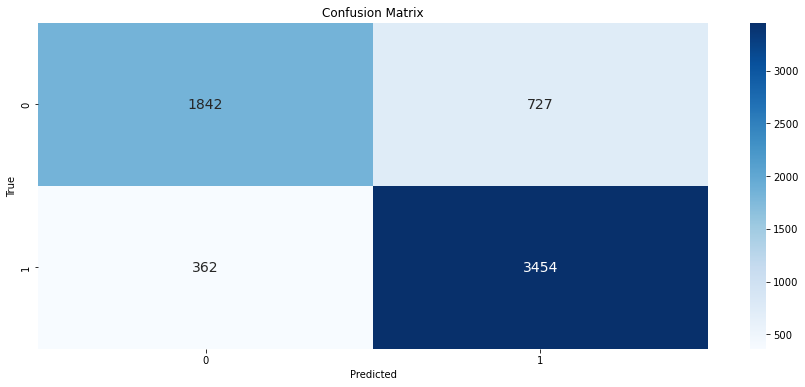

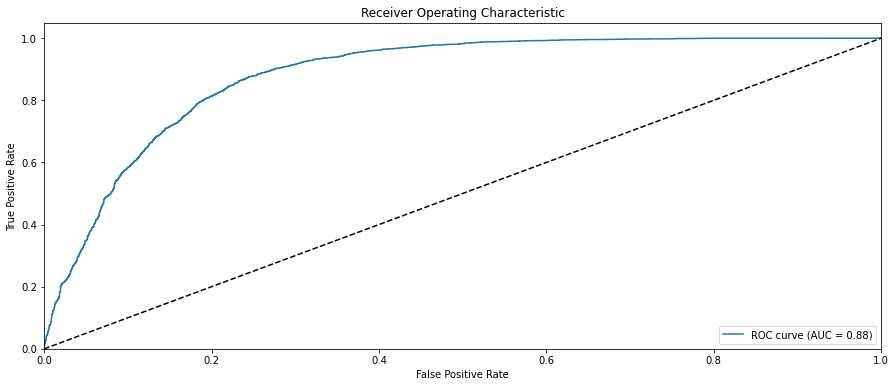

Confusion Matrix:
 [[1842  727]
 [ 362 3454]]
AUC: 0.882227308262602


In [291]:
# applying the function
evaluate_model(model, X_test, y_test)

#### Model Performance Evaluation

- Confusion Matrix:
    - 1842 Customers correctly predicted as not likely to complain (NO)
    - 3454 Customers correctly predicted as likely to complain (YES
    - 727 Customers incorrectly predicted as likely to complain (YES) when they did not complain
    - 362 Customers incorrectly predicted as not likely to complain (NO) when they actually complained

    
- Area Under the Curve (AUC):
    - The measure of the model's performance in distinguishing between customers likely to complain and those not likely to complain
    - The AUC score of 0.88 suggests that the model exhibits good discriminatory power and can effectively differentiate between complaining and non-complaining customers.

#### Explainability with Feature Importance

In [292]:
def plot_feature_importances(model, feature_names):
    """
    Plots the feature importances based on the RandomForestClassifier model.

    Parameters:
        model (RandomForestClassifier): The trained RandomForestClassifier model.
        feature_names (list): List of feature names used in the model.

    Returns:
        None

    """
    importances = model.feature_importances_
    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(15, 6))
    plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Random Forest Classifier Feature Importances')
    plt.show()

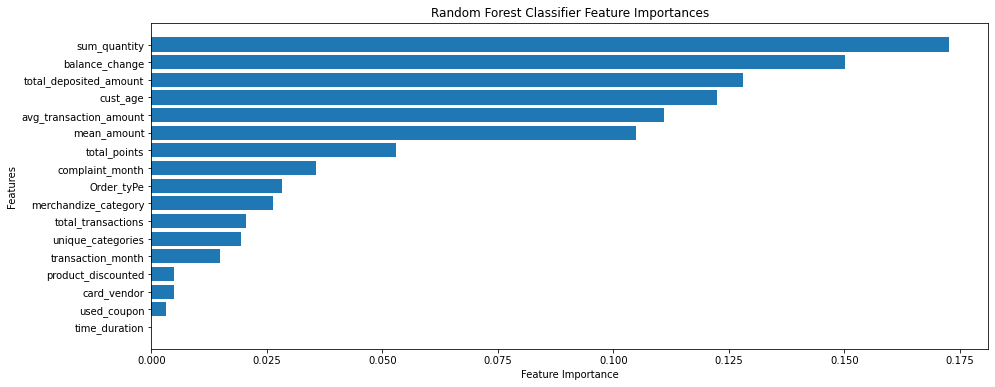

In [293]:
# Get the feature names
feature_names = X_train.columns.tolist()

# Plot the feature importances
plot_feature_importances(model, feature_names)

- The bar graph shows most important features for predicting customer complaints like `sum_quantity`, `balance_change`, `total_deposited_amount`, `cust_age` etc
- Our feature engineering works well, most of generated features are powerfull in prediction of Random Forest Model.

#### Explainability with Local Interpretable Model-agnostic Explanations(LIME)

In [295]:
import lime
import lime.lime_tabular

# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, 
                                                   feature_names=X_train.columns, 
                                                   class_names=['NO', 'YES'],
                                                   mode='classification'
                                                  )

# Select a random sample from the test set for explanation
sample_idx = np.random.randint(0, len(X_test))
sample = X_test.iloc[sample_idx]
true_label = y_test.iloc[sample_idx]

print("\n")
print(f"The True Label of this record is: {true_label} where '0' means 'No' and '1' means 'Yes'")
print("\n")
print(f"Below is LIME explanation - Sample {sample_idx} \n")

# Generate the explanation for the sample
explanation = explainer.explain_instance(sample.values, model.predict_proba, num_features=len(X_test.columns))

# Display the explanation
explanation.show_in_notebook(show_table=True)



The True Label of this record is: 1 where '0' means 'No' and '1' means 'Yes'


Below is LIME explanation - Sample 3622 



- LIME shows how specific factors that influenced the model's decision per prediction. This can be valuable in gaining insights, building trust in the model, and making data-driven decisions in the context of customer complaint management.

## Conclusion & Recommendations:

### Conclusion:
Our goal was to reduce the number of customer complaints by identifying customers who are more likely to complain and collecting their opinions to improve our services. We approached this problem by creating a machine learning model starting with `Logistic Regression`, `Random Forest`, `Light Gradient Boosting Model` & `CatBoost` after evaluation analyisis we opt to stick with `Random Forest Classifier`, by looking on the predictive power fits well with our goal of capturing well customers more likely to complain and Minimize the risk of miss targeting predictions.

After performing data preprocessing, including handling missing values and encoding categorical variables, we trained our Classifier on the transaction history data for the last 30 days. The model was able to predict the likelihood of customer complaints with an accuracy of 82.9%, F1-score of 86% and an AUC score of 81.1%

The confusion matrix provided detailed insights into the model's performance. We observed that the model correctly predicted 1842 instances of customers who did not complain (True Negative) and 3454 instances of customers who complained (True Positive). However, there were 727 cases of customers who complained but were not predicted (False Negative), and 362 cases of customers who did not complain but were predicted to complain (False Positive).

The AUC curve demonstrated the model's ability to discriminate between customers who complained and those who did not. With an AUC score of 0.88, the model exhibited good predictive power and performed significantly better than random chance.

Analyzing the feature importances provided insights into the factors that contributed most to predicting customer complaints. The top contributing features included the balance on the complaint date, the amount deposited via card, the quantity of items purchased, and the customer's age. These features played a crucial role in identifying customers more likely to complain and can be used to prioritize targeted efforts for improving customer satisfaction.

Explainability is a crucial aspect of our machine learning predictions to understand the factors contributing to customer complaints. We employed the `Local Interpretable Model-Agnostic Explanations (LIME)` technique. LIME provides interpretability by generating local explanations for individual predictions. By utilizing LIME, we were able to generate feature importance explanations for specific customer instances, highlighting the key factors that influenced their complaint likelihood. These explanations enable us to gain insights into the decision-making process of our model and understand the specific features driving the predictions. This approach enhances the transparency and interpretability of our model, empowering us to make informed decisions and take targeted actions to improve customer satisfaction and mitigate complaints

Our machine learning model based on Random Forest Classifier proved effective in predicting customer complaints. By utilizing this model, we can proactively identify customers who are more likely to complain and focus our efforts on addressing their concerns. This approach enables us to collect valuable feedback, enhance customer satisfaction, and ultimately reduce the number of complaints, leading to improved overall service quality and customer experience.

### Recommendations:

1. Improve data collection: Consider collecting more detailed and comprehensive data related to customer transactions, interactions, and feedback. This additional data can provide deeper insights into customer behavior and preferences, enabling more accurate predictions and targeted campaigns.

2. Feature Scaling & Explore additional features: Normalising the range of features because are varying in degrees of magnitude, range and units. Experiment with generating new features based on the existing data to capture more information about customer behavior and preferences.

3. Incorporate external data sources: Look for relevant external data sources that can complement the existing transaction history. This may include demographic data, social media sentiment analysis, or customer satisfaction surveys. Integrating such data can provide a more comprehensive view of customer preferences and help identify potential areas for improvement.

4. Regular model retraining: Customer behavior and preferences can evolve over time, so it is important to regularly update and retrain the predictive model. Set up a system to periodically retrain the model using the latest transaction data to ensure it stays accurate and up to date.

5. Collaborate with customer service: Establish a strong feedback loop with the customer service team to gather insights from direct customer interactions. Regularly communicate the findings and recommendations from the predictive model to customer service representatives, enabling them to provide better support and tailored solutions to customers.

6. Continuously monitor and evaluate: Implement a system to track the performance of the call campaign and customer satisfaction metrics over time. Regularly monitor the impact of the campaign and make necessary adjustments to improve its effectiveness.

However, these recommendations can enhance our customer complaint management strategy and further reduce the number of complaints. This will not only result in improved customer satisfaction but also help build a positive brand reputation and foster long-term customer loyalty.